## P2PaLA region correction
Determine which pages have regions that fall outside our baseline


In [1]:
from XML_utils import *
from shapely.geometry import Polygon

In [2]:
data_dir = r"C:\Users\LHoek\Documents\Overlijdensdata\Transkribus\OR_1879-1884\OR_1879-1884\page"
texts, metadata, corrected_texts, infos, textregions = read_files(data_dir)

Nr of baseline swaps: 1313


In [4]:
certificate_keys = []
for certificate in textregions.keys():
    certificate_keys.append(certificate)
print(certificate_keys)

['O.R. 1946 Buiten 2e distr. 001', 'O.R. 1946 Buiten 2e distr. 002', 'O.R. 1946 Buiten 2e distr. 003', 'O.R. 1946 Buiten 2e distr. 004', 'O.R. 1946 Buiten 2e distr. 005', 'O.R. 1946 Buiten 2e distr. 006', 'O.R. 1946 Buiten 2e distr. 007', 'O.R. 1946 Buiten 2e distr. 008', 'O.R. 1946 Buiten 2e distr. 009', 'O.R. 1946 Buiten 2e distr. 010', 'O.R. 1946 Buiten 2e distr. 011', 'O.R. 1946 Buiten 2e distr. 012', 'O.R. 1946 Buiten 2e distr. 013', 'O.R. 1946 Buiten 2e distr. 014', 'O.R. 1946 Buiten 2e distr. 015', 'O.R. 1946 Buiten 2e distr. 016', 'O.R. 1946 Buiten 2e distr. 017', 'O.R. 1946 Buiten 2e distr. 018', 'O.R. 1946 Buiten 2e distr. 019', 'O.R. 1946 Buiten 2e distr. 020', 'O.R. 1946 Buiten 2e distr. 021', 'O.R. 1946 Buiten 2e distr. 022', 'O.R. 1946 Buiten 2e distr. 023', 'O.R. 1946 Buiten 2e distr. 024', 'O.R. 1946 Buiten 2e distr. 025', 'O.R. 1946 Buiten 2e distr. 026', 'O.R. 1946 Buiten 2e distr. 027', 'O.R. 1946 Buiten 2e distr. 028', 'O.R. 1946 Buiten 2e distr. 029', 'O.R. 1946 Bu

In [5]:
regios = []
baseline = Polygon([(650,-125), (650,-1000), (1400,-1000), (1400,-125)]) # general baseline
#baseline = Polygon([(650,-250), (650,-1000), (1350,-1000), (1350,-250)]) # twoLate strict 
#baseline = Polygon([(650,-250), (650,-920), (1310,-920), (1310,-250)]) # twoLate not strict 
#baseline = Polygon([(650,-165), (650,-920), (1310,-920), (1310,-165)]) # twoLate improved
wrong_pages = []

for cert_id, cert in enumerate(certificate_keys):
    t_regions = textregions[cert]
    for id, regio in enumerate(t_regions):
        poly = []
        coords = regio.split(" ")
        for coord in coords:
            x = coord.split(",")[0]
            y = str(int(coord.split(",")[1])*-1)
            poly.append((x,y))
        if baseline.intersects(Polygon(poly)) and not baseline.covers(Polygon(poly)) and not baseline.within(Polygon(poly)) or baseline.contains(Polygon(poly)):
            #print("p"+str(cert_id+1),cert+":",id)
            if ((cert_id+1)) not in wrong_pages:
                wrong_pages.append(cert_id+1)

print(len(certificate_keys))
print(wrong_pages)
print(len(wrong_pages))
print(len(wrong_pages)/len(certificate_keys))


2573
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 186, 212, 228, 284, 320, 328, 348, 350, 352, 356, 360, 366, 370, 372, 376, 378, 380, 536, 600, 604, 608, 612, 616, 632, 640, 644, 648, 652, 656, 660, 664, 668, 670, 672, 676, 678, 680, 682, 684, 686, 688, 690, 692, 696, 700, 702, 70

(array([1., 1., 1., ..., 1., 0., 1.]),
 array([1.000000e+00, 1.857000e+00, 2.714000e+00, ..., 2.570286e+03,
        2.571143e+03, 2.572000e+03]),
 <BarContainer object of 3000 artists>)

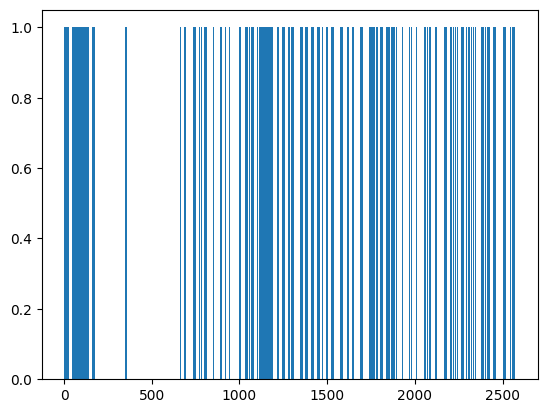

In [6]:
import matplotlib.pyplot as plt
plt.hist(wrong_pages, bins=3000)

Wrong pages 1879-1884

8, 58, 114, 130, 144, 213, 446, 472, 488, 490, 492, 494, 498, 503, 519, 521, 523, 525, 535, 537, 539, 541, 546, 547, 549, 550, 552, 553, 583, 584, 585, 612, 659, 660, 678, 710, 712, 825, 831, 863, 982, 991, 1046, 1055, 1062, 1064, 1065, 1069 1079, 1134, 1148, 1232, 1236, 1237, 1238, 1255, 1260, 1261, 1277, 1283, 1292, 1296, 1307, 1309, 1310, 1311, 1312, 1313, 1328, 1338, 1348, 1356, 1366, 1374, 1382, 1418, 1425, 1444, 1449, 1451, 1454, 1457, 1458, 1462, 1463, 1466, 1467, 1472, 1475, 1476, 1483, 1487, 1549, 1645, 1651, 1653, 1672, 1700, 1740, 1776, 1778, 1897, 2023, 2057, 2100, 2104, 2116, 2117, 2123, 2132, 2139, 2147, 2151, 2156, 2171, 2181, 2184, 2200, 2213, 2226, 2229, 2233, 2245, 2300, 2356, 2376, 2392, 2396, 2462, 2468, 2475, 2479, 2535, 2663, 2785, 2821


Wrong pages 1885-1889

1887 should be handled manually

1885-1886:
10, 25, 28, 32, 37, 73, 92, 97, 129, 137, 185, 205, 245, 434, 504, 763, 766, 772, 842, 905, 996, 1127, 

1887:
1143, 1144, 1145, 1146, 1160, 1161, 1164, 1165, 1185, 1188, 1195, 1225, 1227, 1252, 1254, 1256, 
1269, 1275, 1363, 1365, 1366, 1368, 1377, 1378, 1381, 1385, 1386, 1392, 1393, 1397, 1401, 1405, 1406, 
1407, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1421, 1427, 1480, 1487, 1488, 1495, 
1496, 1499, 1500, 1501, 1502, 1504, 1505, 1506, 1507, 1508, 1510, 1511, 1512, 1513, 1515, 1516, 1517, 
1519, 1520, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1533, 1535, 1536, 1537, 1538, 1540, 
1542, 1545, 1546, 1548, 1549, 1550, 1551, 1553, 1556, 1557, 1561, 1579, 1587, 1588, 1621, 1639, 1643, 

1888-1889:
1798, 1802, 1909, 2189, 2193, 2194, 2197, 2288, 2298, 2347


Wrong pages 1890-1894

[97, 664, 672, 732, 896, 1075, 1124, 1173, 1179, 1296, 1299, 1312, 1318, 1323, 1371, 1451, 1604, 1757, 1773, 1797, 1815, 1911, 1935, 1999, 2111, 2353, 2361]


Wrong pages 1895+1905-1907

[136, 163, 246, 307, 496, 568, 584, 689, 690, 737, 1407, 1619, 1786, 1830, 2165, 2175, 2176, 2230, 2238, 2248, 2379, 2380, 2383, 2391, 2495, 2502, 2514, 2551, 2559, 2595, 2707]




Wrong pages 1908-1909+1930

[130, 133, 161, 441, 443, 552, 553, 589, 1139, 1418, 1432, 1436, 1440, 1454, 1457, 1467, 1471, 1472, 1478, 1668, 1670, 1690, 1712, 1752, 1806, 1826, 1850, 1872, 1880, 1886, 1890, 1918, 1997, 2057]


Wrong pages 1931-1934

[531, 633, 657, 673, 676, 685, 689, 713, 721, 724, 736, 740, 741, 749, 751, 752, 753, 755, 757, 759, 760, 761, 763, 769, 771, 776, 777, 785, 787, 811, 835, 837, 855, 1725, 2002, 2030, 2034, 2046, 2054, 2062, 2066, 2070, 2082, 2083, 2084, 2088, 2094, 2098, 2100, 2108, 2110, 2112, 2118, 2122, 2123, 2126, 2148, 2150, 2156, 2158, 2159, 2160, 2161, 2164, 2166, 2172, 2176, 2188, 2196, 2199, 2200, 2204, 2210, 2212, 2222, 2282, 2678, 2783, 2855, 2903]


Wrong pages 1935-1937

[357, 481, 509, 575, 963, 975, 1042, 1062, 1203, 1211, 1215, 1276, 1283, 1315, 1319, 1320, 1322, 1359, 1363, 1447, 1474, 1481, 1492, 1496, 1513, 1552, 1567, 1579, 1796, 1979, 1988, 2014, 2177, 2225, 2292, 2293]



Wrong pages 1938-1939+1945-1946 Stad

41, 49, 61, 118, 187, 369, 462, 554, 558, 598, 632, 643, 731, 766, 781, 791, 835, 894, 912, 975, 990, 1006, 1010, 1025, 1099, 1134, 1143, 1148, 1195, 1196, 1197, 1217, 1242, 1253, 1274, 1286, 1310, 1392, 1399, 1400, 1439, 1442, 1443, 1447, 1453, 1458, 1503, 1513, 1514, 1530, 1532, 1534, 1536, 1539, 1544, 1546, 1550, 1552, 1554, 1556, 1558, 1560, 1562, 1570, 1574, 1576, 1577, 1578, 1580, 1582, 1584, 1586, 1588, 1592, 1594, 1596, 1599, 1600, 1604, 1606, 1612, 1624, 1626, 1628, 1632, 1633, 1634, 1636, 1638, 1640, 1644, 1648, 1665, 1707, 1713, 1721, 1753, 1823, 1847, 1883, 1961, 2031, 2039, 2047, 2051, 2055, 2063, 2071, 2075, 2079, 2083, 2091, 2095, 2099, 2103, 2107, 2111, 2115, 2119, 2123, 2127, 2131, 2135, 2147, 2151, 2159, 2165, 2171, 2179, 2185, 2187, 2342, 2378, 2418, 2520, 2566, 2570, 2574, 2578, 2606, 2612, 2618, 2630, 2634, 2638, 2646, 2650, 2652, 2658, 2662, 2666, 2672, 2674, 2686, 2690, 2698, 2702, 2710, 2722, 2730, 2872



Wrong pages 1946 Buiten 1947-1949

140, 303, 564, 591, 631, 675, 731, 775, 807, 865, 1008, 1010, 1012, 1053, 1054, 1058, 1061, 1065, 1067, 1070, 1072, 1075, 1076, 1078, 1079, 1083, 1092, 1097, 1098, 1099, 1103, 1108, 1124, 1170, 1171, 1182, 1195, 1207, 1231, 1247, 1274, 1374, 1393, 1421, 1523, 1578, 1593, 1599, 1625, 1629, 1689, 1749, 1755, 1762, 1852, 1856, 1857, 1909, 1910, 1939, 1943, 1947, 1948, 1959, 1963, 1971, 1972, 1979, 1983, 1987, 1991, 1995, 1999, 2003, 2006, 2011, 2015, 2019, 2023, 2027, 2031, 2032, 2035, 2039, 2040, 2059, 2063, 2083, 2087, 2095, 2103, 2111, 2115, 2127, 2131, 2136, 2143, 2151, 2155, 2175, 2179, 2183, 2187, 2188, 2191, 2199, 2200, 2223, 2235, 2250, 2262, 2271, 2278, 2282, 2294, 2298, 2306, 2310, 2314, 2334, 2338, 2347, 2350, 2354, 2358, 2362, 2370, 2382, 2394, 2398, 2400, 2406, 2410, 2414, 2418, 2430, 2438, 2446, 2482, 2490, 2509, 2537, 2561, 2562, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572

